In [ ]:
import pandas as pd
import anndata as ad
import custom_func as pc 
import umap as um
from sklearn.cluster import HDBSCAN
import numpy as np

/opt/anaconda3/envs/mydev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### OPEN ANNDATA FILE

In [3]:
path = '/Users/maksimsgolubovics/Studienprojekt/Studienprojekt/Study Project/mouse_liver'
adata = ad.read_h5ad(path)

In [4]:
adata

AnnData object with n_obs × n_vars = 1096 × 40614
    obs: 'study', 'time', 'outlier', 'Sex', 'Light', 'Age (weeks)', 'Sequencing Type', 'Inferred Sequencing Type', 'Note'
    var: 'Symbol'
    obsm: 'centered_study_log_small', 'small_reduction'
    layers: 'centered_study_log_full', 'centered_study_log_full_pydeseq2', 'deseq2_norm', 'log_trasformed', 'log_trasformed_deseq2', 'not_normalized'

### TPM — BATCH EFFECT CORRECTION

In [3]:
sr_df = adata.obsm['small_reduction']
sr_df_time_setup = sr_df.join(adata.obs['time'])

#### Time

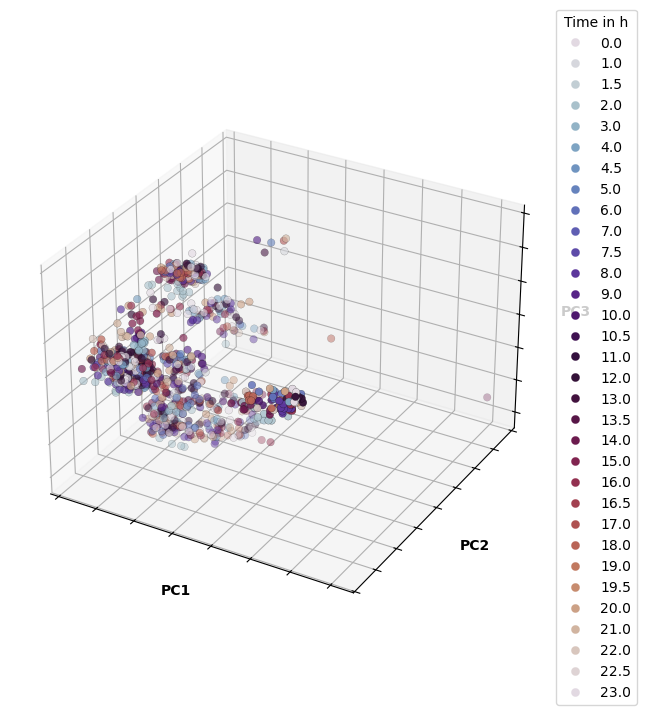

In [9]:
sr_df_time = sr_df.join(adata.obs['time']).reset_index().drop('index', axis=1).set_index('time')#.sort_index(ascending=True)
pc.principal_component_3d_timesample(data=pc.residual(sr_df_time, ['time']), label='Time in h', c_map='twilight')

#### Sex

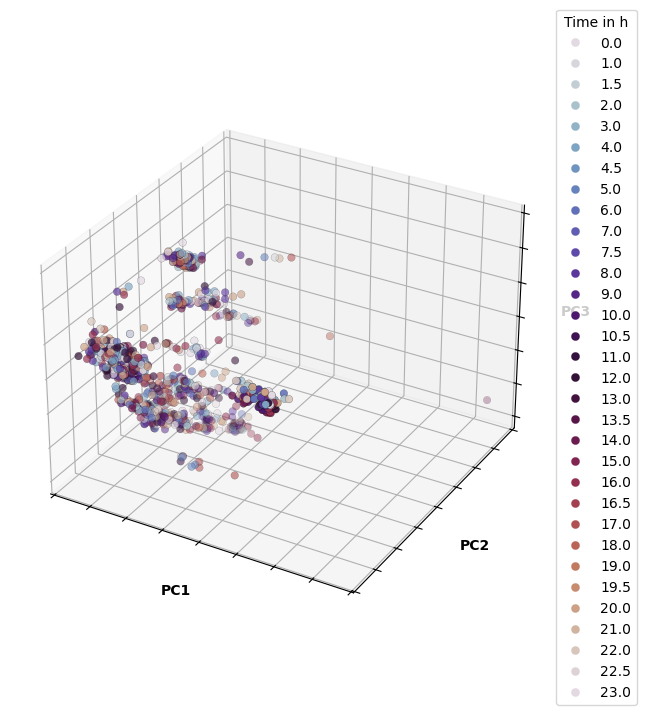

In [10]:
sr_df_sex = sr_df.join(adata.obs['Sex']).join(sr_df_time_setup['time']).reset_index().drop('index', axis=1).set_index(['Sex', 'time'])
x = pc.residual(sr_df_sex, ['Sex']).reset_index().drop(columns='Sex').set_index('time').sort_index(ascending=True)
pc.principal_component_3d_timesample(data=x, label='Time in h', c_map='twilight')

#### Light

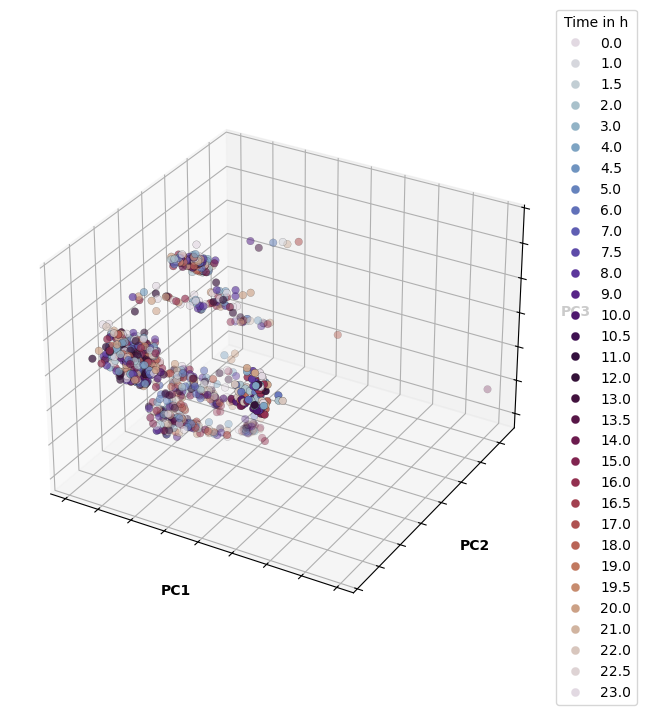

In [11]:
sr_df_light = sr_df.join(adata.obs['Light']).join(sr_df_time_setup['time']).reset_index().drop('index', axis=1).set_index(['Light', 'time'])
x = pc.residual(sr_df_light, ['Light']).reset_index().drop(columns='Light').set_index('time').sort_index(ascending=True)
pc.principal_component_3d_timesample(data=x, label='Time in h', c_map='twilight')

#### Age

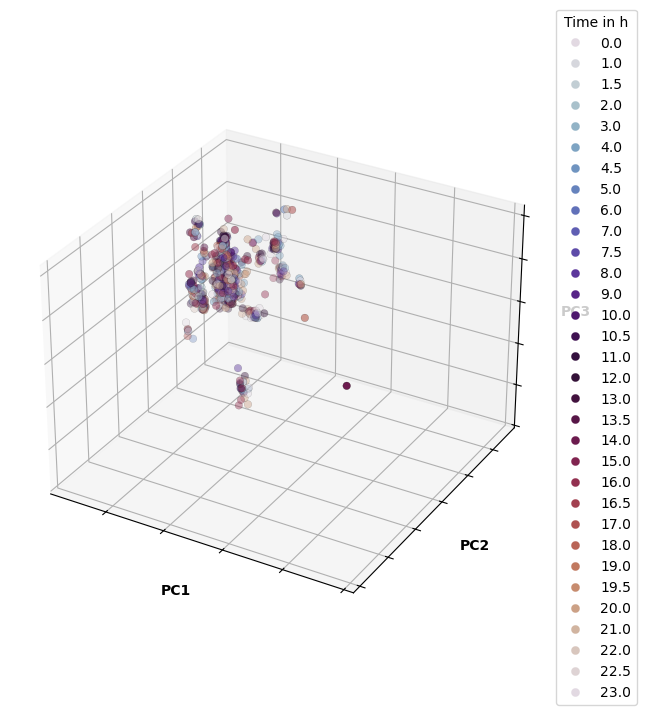

In [13]:
sr_df_age = sr_df.join(adata.obs['Age (weeks)']).join(sr_df_time_setup['time']).reset_index().drop('index', axis=1).set_index(['Age (weeks)', 'time'])
x = pc.residual(sr_df_age, ['Age (weeks)']).reset_index().drop(columns='Age (weeks)').set_index('time').sort_index(ascending=True)
pc.principal_component_3d_timesample(data=x, label='Time in h', c_map='twilight')

#### Sequencing Type

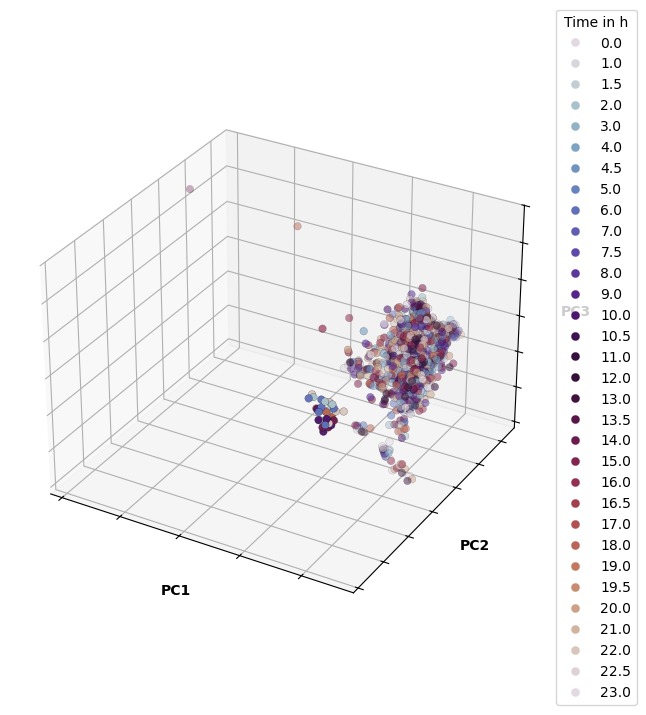

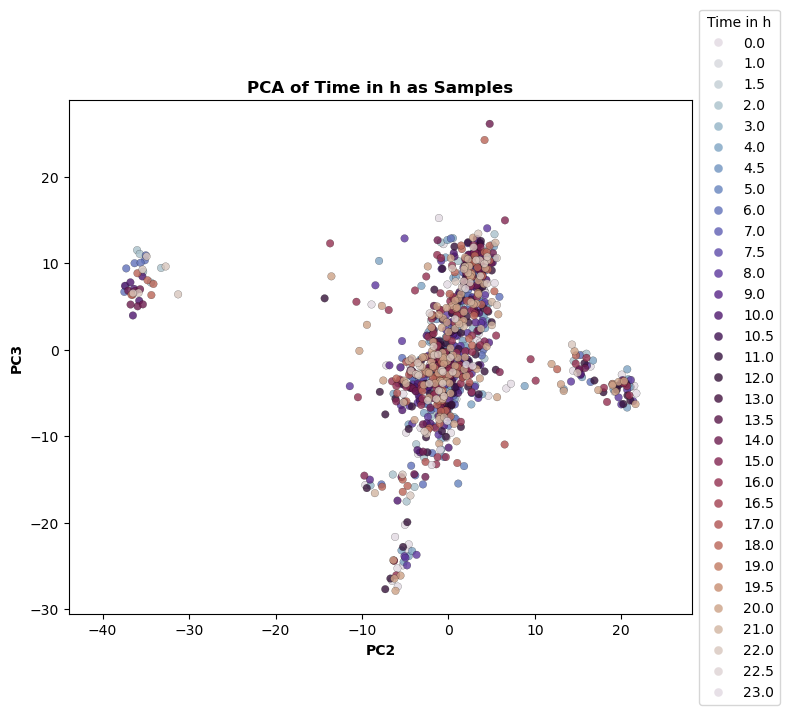

In [5]:
sr_df_st = sr_df.join(adata.obs['Sequencing Type']).join(sr_df_time_setup['time']).reset_index().drop('index', axis=1).set_index(['Sequencing Type', 'time'])
x = pc.residual(sr_df_st, ['Sequencing Type']).reset_index().drop(columns='Sequencing Type').set_index('time').sort_index(ascending=True)
pc.principal_component_3d_timesample(data=x, label='Time in h', c_map='twilight')
pc.principal_component_2d_timesample(data=x, label='Time in h', x=2, y=3, c_map='twilight')

#### Inferred Sequencing Type

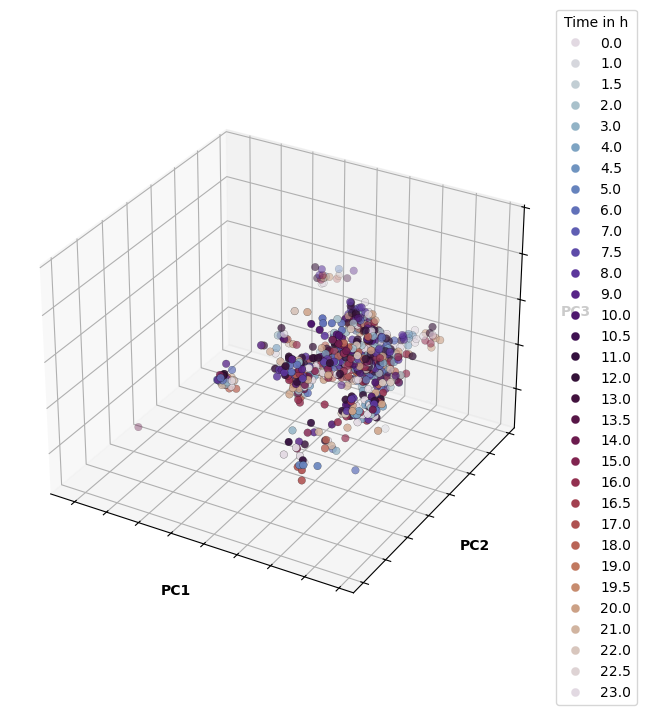

In [15]:
sr_df_ist = sr_df.join(adata.obs['Inferred Sequencing Type']).join(sr_df_time_setup['time']).reset_index().drop('index', axis=1).set_index(['Inferred Sequencing Type', 'time'])
x = pc.residual(sr_df_ist, ['Inferred Sequencing Type']).reset_index().drop(columns='Inferred Sequencing Type').set_index('time').sort_index(ascending=True)
pc.principal_component_3d_timesample(data=x, label='Time in h', c_map='twilight')

#### Note

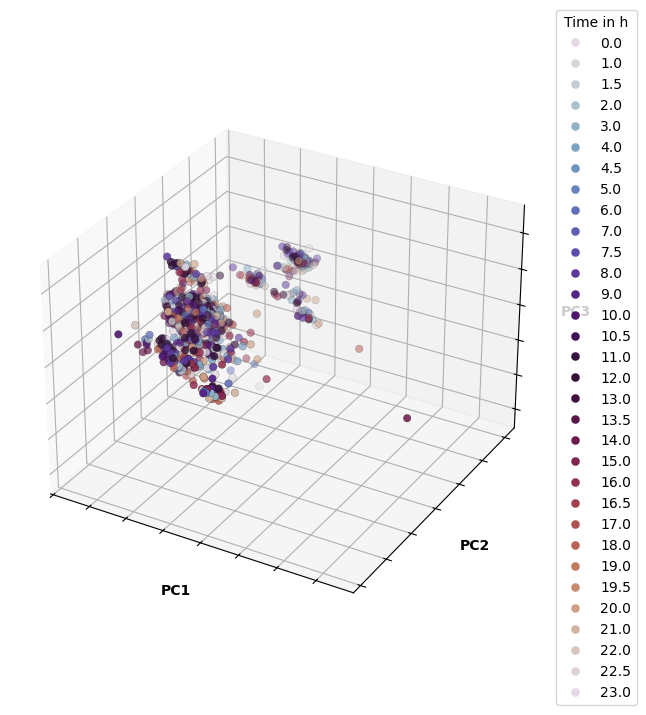

In [16]:
sr_df_note = sr_df.join(adata.obs['Note']).join(sr_df_time_setup['time']).reset_index().drop('index', axis=1).set_index(['Note', 'time'])
x = pc.residual(sr_df_note, ['Note']).reset_index().drop(columns='Note').set_index('time').sort_index(ascending=True)
pc.principal_component_3d_timesample(data=x, label='Time in h', c_map='twilight')

#### Sex, Light, Age, Sequencing type

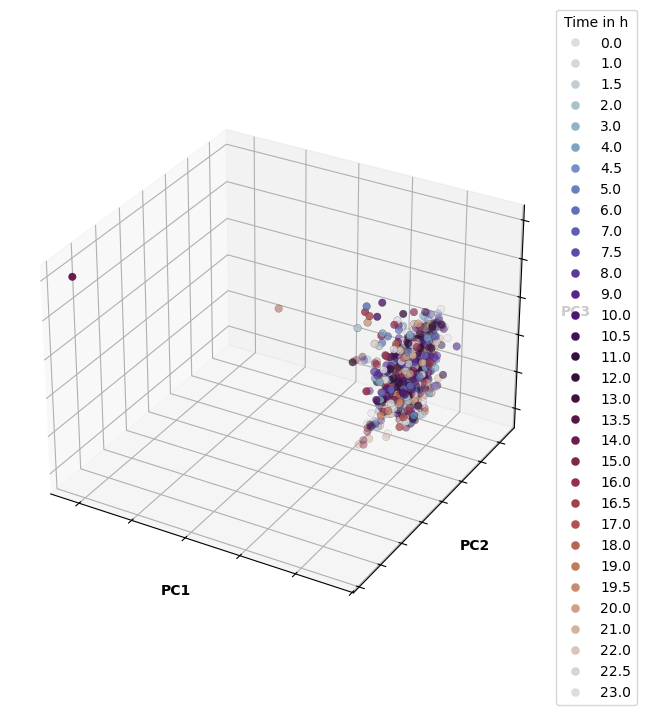

In [17]:
x_0=pc.residual_dummy(data=sr_df, data_dummy_1=adata.obs['Sex'], columns='Sex')
x_1=pc.residual_dummy(data=x_0, data_dummy_1=adata.obs['Light'], columns='Light')
x_2=pc.residual_dummy(data=x_1, data_dummy_1=adata.obs['Age (weeks)'], columns='Age (weeks)')
x_3=pc.residual_dummy(data=x_2, data_dummy_1=adata.obs['Sequencing Type'], columns='Sequencing Type').join(adata.obs['time']).reset_index().drop(columns='index').set_index('time').sort_index(ascending=True)
pc.principal_component_3d_timesample(data=x_3, label='Time in h', c_map='twilight')

#### All features aside study

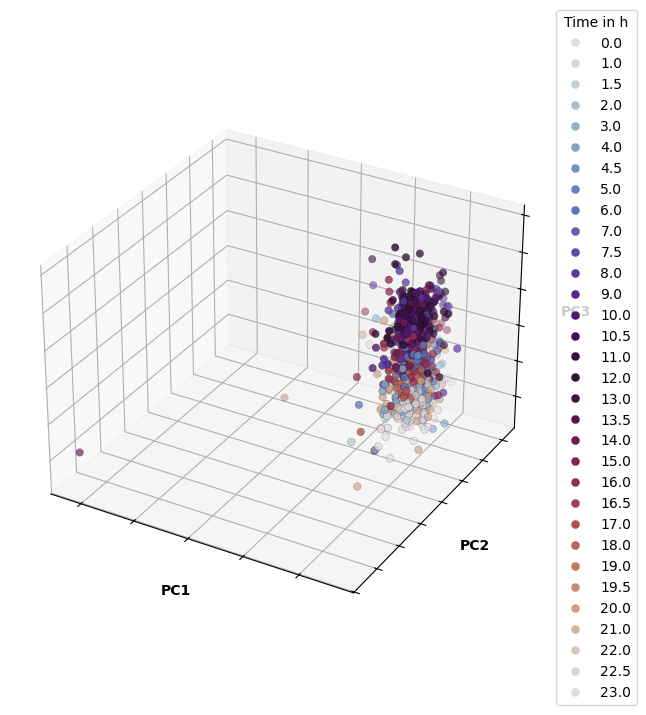

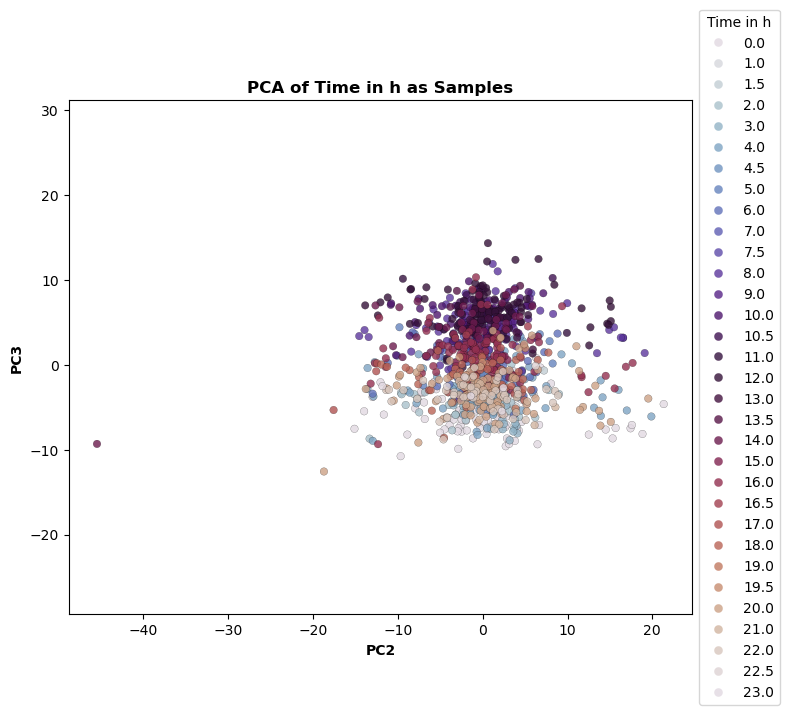

In [6]:
x_0=pc.residual_dummy(data=sr_df, data_dummy_1=adata.obs['Sex'], columns='Sex')
x_1=pc.residual_dummy(data=x_0, data_dummy_1=adata.obs['Light'], columns='Light')
x_2=pc.residual_dummy(data=x_1, data_dummy_1=adata.obs['Age (weeks)'], columns='Age (weeks)')
x_3=pc.residual_dummy(data=x_2, data_dummy_1=adata.obs['Sequencing Type'], columns='Sequencing Type')
x_4=pc.residual_dummy(data=x_3, data_dummy_1=adata.obs['Note'], columns='Note')
x_5=pc.residual_dummy(data=x_4, data_dummy_1=adata.obs['Inferred Sequencing Type'], columns='Inferred Sequencing Type').join(adata.obs['time']).reset_index().drop(columns='index').set_index('time').sort_index(ascending=True)
pc.principal_component_3d_timesample(data=x_5, label='Time in h', c_map='twilight')
pc.principal_component_2d_timesample(data=x_5, x=2, y=3, label='Time in h', c_map='twilight')

#### Study

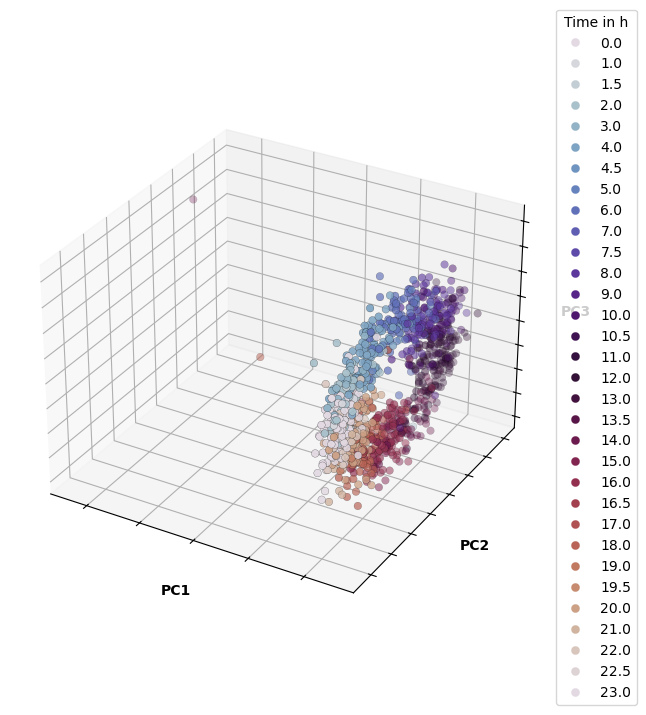

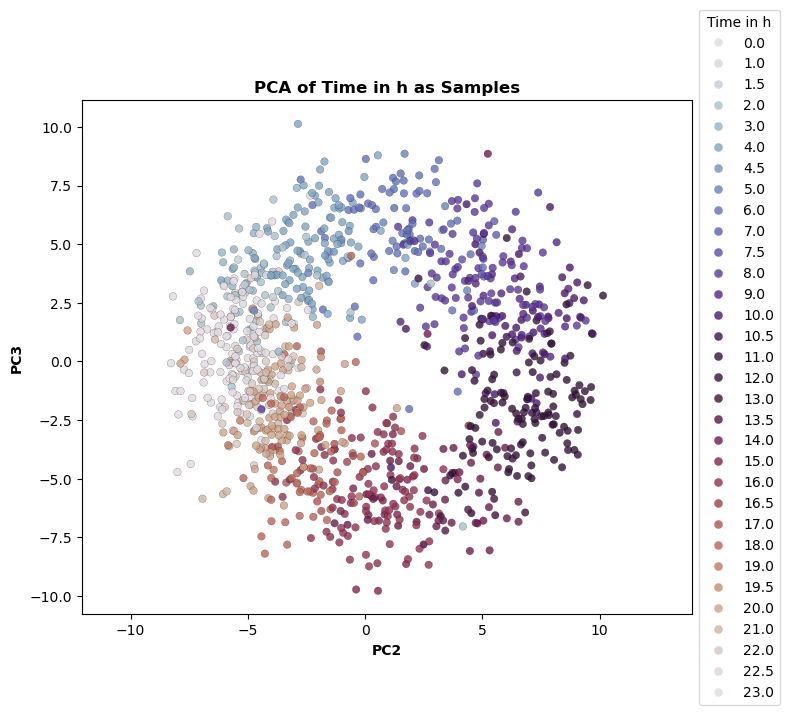

In [ ]:
sr_df_study = sr_df.join(adata.obs['study']).join(sr_df_time_setup['time']).reset_index().drop('index', axis=1).set_index(['study', 'time'])
x = pc.residual(sr_df_study, ['study']).reset_index().drop(columns='study').set_index('time')
pc.principal_component_3d_timesample(data=x, label='Time in h', c_map='twilight')
pc.principal_component_2d_timesample(data=x, x=2, y=3 ,label='Time in h', c_map='twilight')

#### Elimination of outliers

GSM1890905   -229.619716
GSM4585586   -118.286373
GSM2722778    -36.974561
GSM4585613    -28.538300
GSM2722789    -26.916930
GSM4547885    -26.241589
GSM1788712    -24.803546
GSM1788732    -22.954502
GSM6506646    -21.978688
GSM2973661    -21.103296
dtype: float64
Name        ENSMUSG00000087193  ENSMUSG00000039545  ENSMUSG00000085599  \
GSM2046160            0.123422            0.036091           -0.007415   
GSM2046184           -0.046417           -0.050122           -0.011627   
GSM2046157            0.001620           -0.069548            0.048106   
GSM2046183            0.095960            0.012141           -0.012399   
GSM2046155           -0.046417           -0.019515            0.191998   
...                        ...                 ...                 ...   
GSM6610738           -0.002991           -0.093778            0.043463   
GSM6610724           -0.002991            0.026997            0.022049   
GSM6610752           -0.002991           -0.069177            0.06156

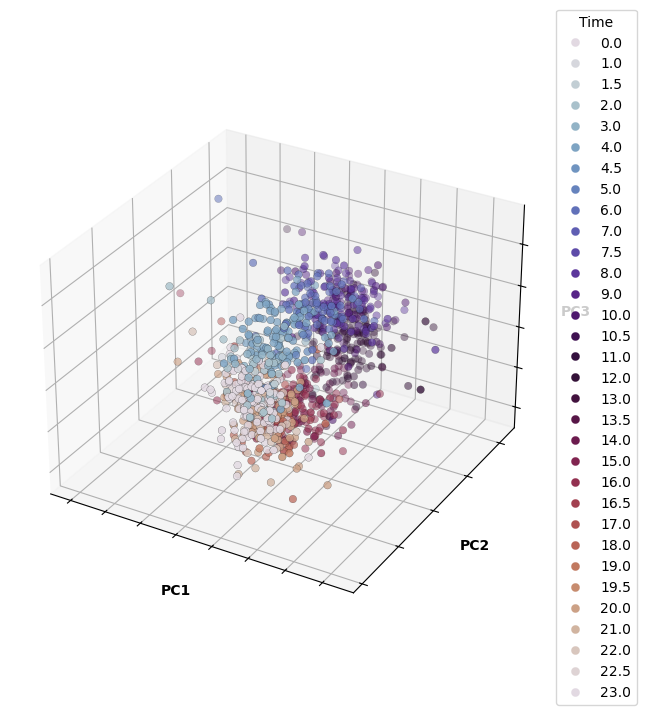

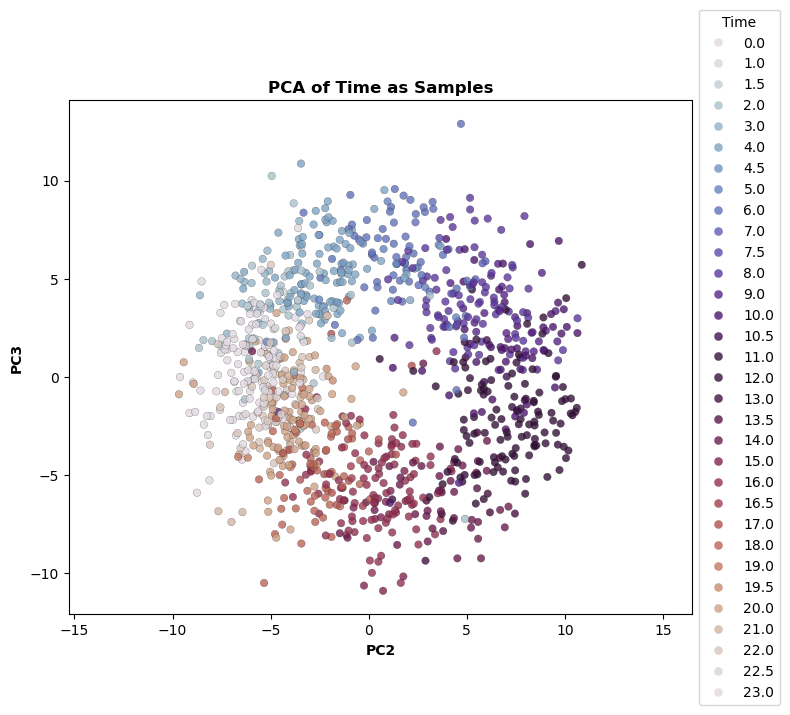

In [40]:
from sklearn.decomposition import PCA

x_0=pc.residual_dummy(data=adata.layers['log_trasformed'], data_dummy_1=adata.obs['study'], columns='study')
adata.layers['batch_log'] = x_0
adata_df = adata.to_df(layer='batch_log')


#Eliminate 2 outliers in PCA
pca = PCA(n_components=1)
fit = pca.fit_transform(adata_df).flatten()
s = pd.Series(fit, index=adata_df.index)
print(s.nsmallest(10))
adata_df_clean = adata_df.drop(['GSM1890905', 'GSM4585586'])
print(adata_df_clean)


pc.principal_component_3d_timesample(data=adata_df_clean.join(adata.obs['time']).reset_index().drop('index', axis=1).set_index('time'), label='Time', c_map='twilight')
pc.principal_component_2d_timesample(data=adata_df_clean.join(adata.obs['time']).reset_index().drop('index', axis=1).set_index('time'), x=2, y=3, label='Time', c_map='twilight')

### DESEQ2 — BATCH EFFECT CORRECTION

In [23]:
deseq2_df = adata.to_df(layer='log_trasformed_deseq2')
sdeseq2_df_time_setup = deseq2_df.join(adata.obs['time'])

In [26]:
sdeseq2_df_time_setup

,ENSMUSG00000087193,ENSMUSG00000039545,ENSMUSG00000085599,ENSMUSG00000084908,ENSMUSG00000086484,ENSMUSG00000085087,ENSMUSG00000085224,ENSMUSG00000085491,ENSMUSG00000086994,ENSMUSG00000086669,...,ENSMUSG00000092496,ENSMUST00000177819,ENSMUSG00000083580,ENSMUSG00000085891,ENSMUSG00000063488,ENSMUST00000058336,ENSMUSG00000025754,ENSMUSG00000092464,ENSMUST00000053062,time
GSM2046160,0.265212,0.750446,0.152544,0.000000,0.152544,0.428676,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.354590,2.319312,0.0,0.0,0.000000,0.640152,22.0
GSM2046184,0.000000,0.518083,0.164158,0.000000,0.000000,0.518083,0.0,0.0,0.000000,0.164158,...,0.0,0.0,0.164158,0.452918,2.300960,0.0,0.0,0.000000,0.164158,22.0
GSM2046157,0.145774,0.341746,0.254721,0.000000,0.000000,0.476294,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,2.248351,0.0,0.0,0.145774,0.000000,10.0
GSM2046183,0.263726,0.714209,0.151581,0.000000,0.000000,0.489740,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.151581,2.325428,0.0,0.0,0.000000,0.593710,18.0
GSM2046155,0.000000,0.595113,0.552602,0.000000,0.000000,0.392391,0.0,0.0,0.000000,0.595113,...,0.0,0.0,0.000000,0.135789,2.356357,0.0,0.0,0.135789,0.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM6610738,0.000000,0.453302,0.672872,0.000000,0.000000,0.000000,0.0,0.0,0.184626,0.184626,...,0.0,0.0,0.000000,0.184626,1.859756,0.0,0.0,0.000000,0.000000,13.5
GSM6610724,0.000000,0.757176,0.710586,0.000000,0.000000,0.664510,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.486823,1.876942,0.0,0.0,0.000000,0.000000,7.5
GSM6610752,0.000000,0.554316,0.678667,0.000000,0.000000,0.433670,0.0,0.0,0.000000,0.226794,...,0.0,0.0,0.000000,0.375024,2.032548,0.0,0.0,0.000000,0.000000,19.5
GSM6610726,0.155251,0.558451,0.807859,0.249191,0.000000,0.780843,0.0,0.0,0.000000,0.406530,...,0.0,0.0,0.000000,0.334947,1.858607,0.0,0.0,0.000000,0.000000,7.5


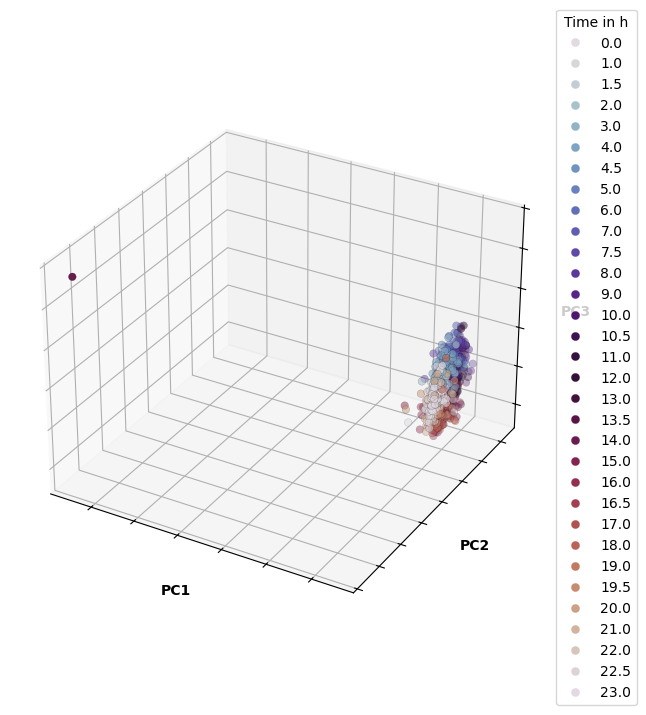

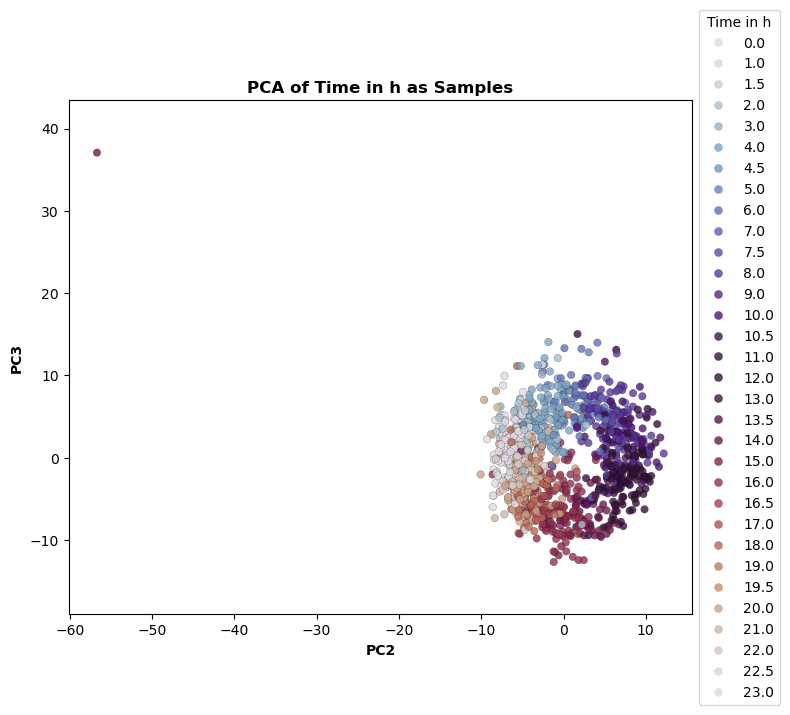

In [27]:
deseq2_df_study = deseq2_df.join(adata.obs['study']).join(sdeseq2_df_time_setup['time']).reset_index().drop('index', axis=1).set_index(['study', 'time'])
x = pc.residual(deseq2_df_study, ['study']).reset_index().drop(columns='study').set_index('time')
pc.principal_component_3d_timesample(data=x, label='Time in h', c_map='twilight')
pc.principal_component_2d_timesample(data=x, x=2, y=3 ,label='Time in h', c_map='twilight')

In [26]:
adata

AnnData object with n_obs × n_vars = 1096 × 40614
    obs: 'study', 'time', 'outlier', 'Sex', 'Light', 'Age (weeks)', 'Sequencing Type', 'Inferred Sequencing Type', 'Note'
    var: 'Symbol'
    obsm: 'centered_study_log_full', 'centered_study_log_full_pydeseq2', 'centered_study_log_small', 'small_reduction'
    layers: 'centered_study_log_full', 'centered_study_log_full_pydeseq2', 'deseq2_norm', 'log_trasformed', 'log_trasformed_deseq2', 'not_normalized', 'batch_log'

GSM1890905   -276.164173
GSM6946839    -28.525957
GSM1788712    -24.159291
GSM3172851    -22.927579
GSM1788732    -19.517713
GSM2585900    -19.451777
GSM2722778    -19.276701
GSM5735716    -16.478065
GSM6672167    -16.311955
GSM2722789    -15.725144
dtype: float64
Name        ENSMUSG00000087193  ENSMUSG00000039545  ENSMUSG00000085599  \
GSM2046160            0.176223            0.300373           -0.013289   
GSM2046184           -0.088989            0.068010           -0.001674   
GSM2046157            0.056784           -0.108327            0.088889   
GSM2046183            0.174736            0.264136           -0.014252   
GSM2046155           -0.088989            0.145039            0.386769   
...                        ...                 ...                 ...   
GSM6610738           -0.007080           -0.140937            0.045797   
GSM6610724           -0.007080            0.162938            0.083511   
GSM6610752           -0.007080           -0.039923            0.05159

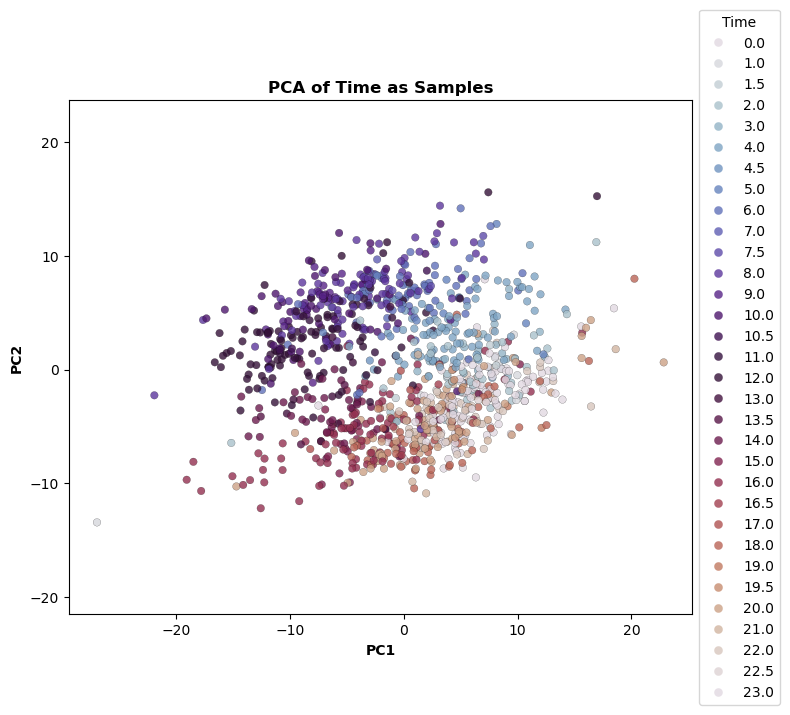

In [41]:
from sklearn.decomposition import PCA

adata_df = adata.to_df(layer='centered_study_log_full_pydeseq2')


#Eliminate outlier in PCA
pca = PCA(n_components=1)
fit = pca.fit_transform(adata_df).flatten()
s = pd.Series(fit, index=adata_df.index)
print(s.nsmallest(10))
adata_df_clean = adata_df.drop(['GSM1890905'])
print(adata_df_clean)


pc.principal_component_2d_timesample(data=adata_df_clean.join(adata.obs['time']).reset_index().drop('index', axis=1).set_index('time'), label='Time', c_map='twilight')

### USING UMAP TO FINDING BATCHES

In [7]:
study = adata.to_df(layer='log_trasformed').join(adata.obs['study']).reset_index().drop(columns='index').set_index('study').sort_index(ascending=True)

/opt/anaconda3/envs/mydev/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


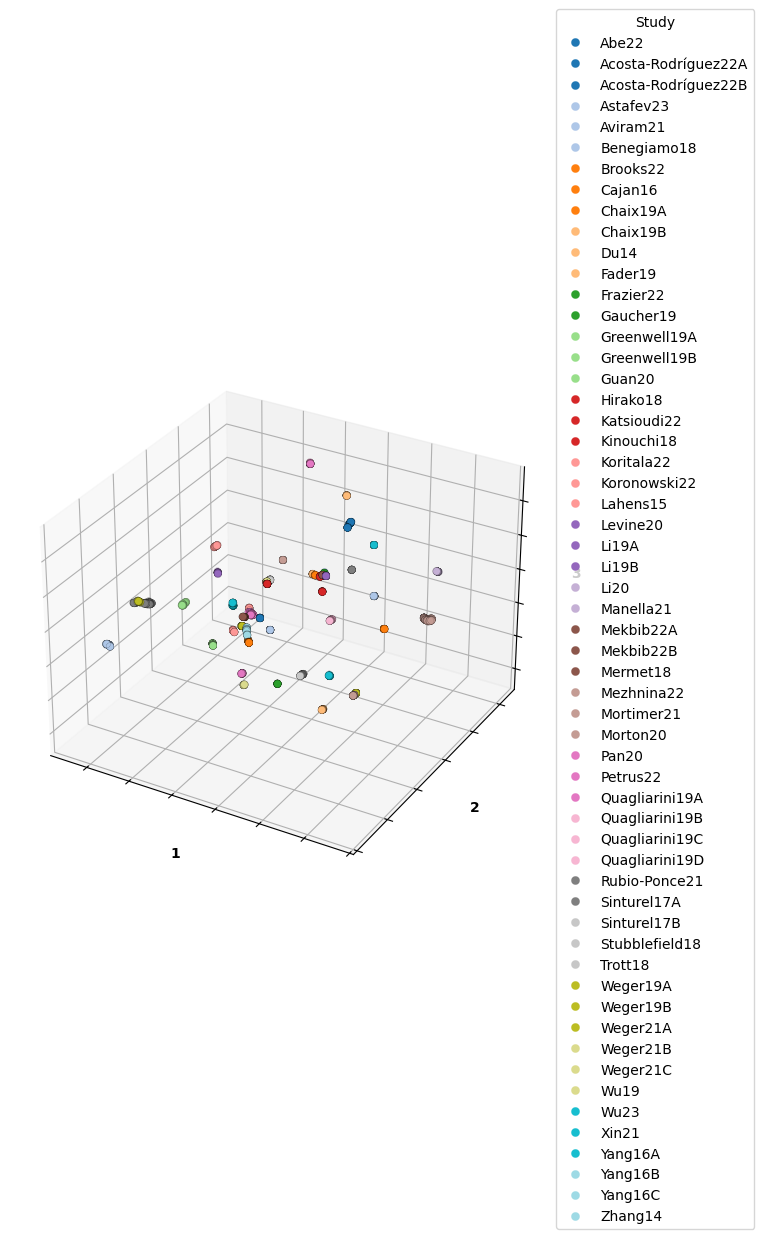

In [15]:
pc.visualization_of_dec_tools_3d(dec=um.UMAP(n_components=3,min_dist=0.0), data=study, label='Study')

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56]
      ENSMUSG00000087193  ENSMUSG00000039545  ENSMUSG00000085599  \
time                                                               
0.0            -1.000000           -0.721194           -0.933447   
0.0            -1.000000           -0.919803           -1.000000   
0.0            -1.000000           -0.886953           -1.000000   
0.0            -0.939861           -0.728337            0.233811   
0.0            -1.000000           -0.638686           -1.000000   
...                  ...                 ...                 ...   
23.0           -1.000000           -0.936123           -1.000000   
23.0           -1.000000           -0.969137           -1.000000   
23.0           -1.000000           -1.000000            0.536590   
23.0           -1.000000           -0.350605            0.704138   
23.0  

/var/folders/3g/z5c6jlkn4dg5mg5rrpmsrmb80000gn/T/ipykernel_45244/768263660.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cs_df_r_time['clusters'] = clusters.copy()


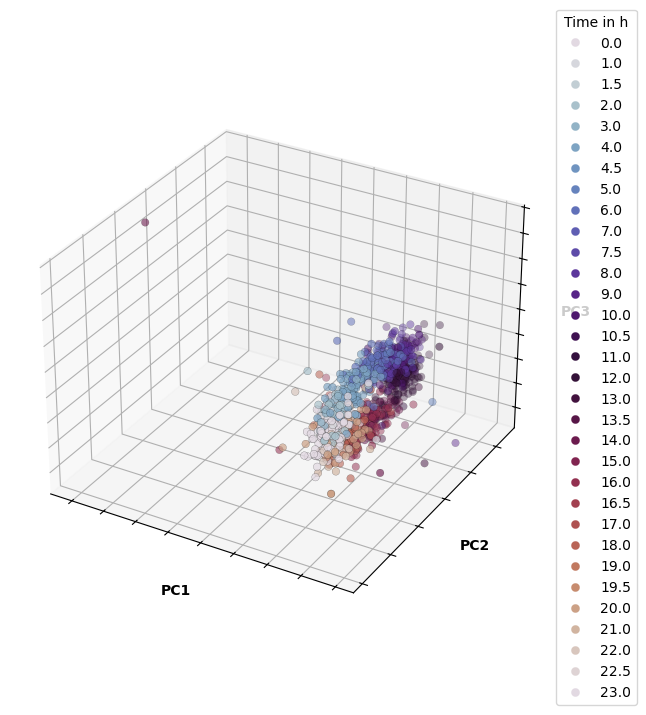

In [5]:
cs_df_r_time = adata.to_df(layer='log_trasformed').join(adata.obs['time']).reset_index().drop(columns='index').set_index('time').sort_index(ascending=True)

umap = um.UMAP(n_components=10, min_dist=0.0)
X_umap = umap.fit_transform(cs_df_r_time)
hdbscan = HDBSCAN(n_jobs=-1)
clusters = hdbscan.fit_predict(X_umap)
print(np.unique(clusters))
cs_df_r_time['clusters'] = clusters.copy()
print(cs_df_r_time)
residual = pc.residual(data=cs_df_r_time, columns=['clusters'])
pc.principal_component_3d_timesample(data=residual, label='Time in h', c_map='twilight')

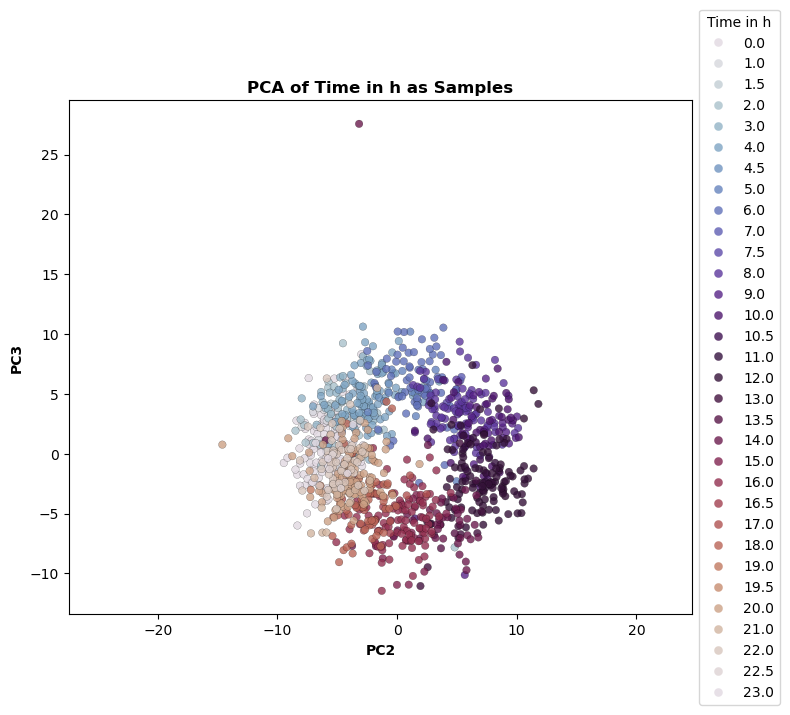

In [6]:
pc.principal_component_2d_timesample(data=residual, label='Time in h', x=2, y=3, c_map='twilight')